In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import librosa

In [2]:
# Mendefinisikan path folder suara tinggi dan suara rendah
path_suara_tinggi = "Suara Tinggi"
path_suara_rendah = "Suara rendah"

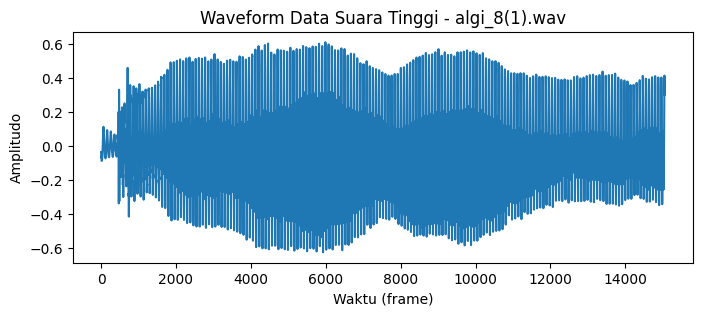

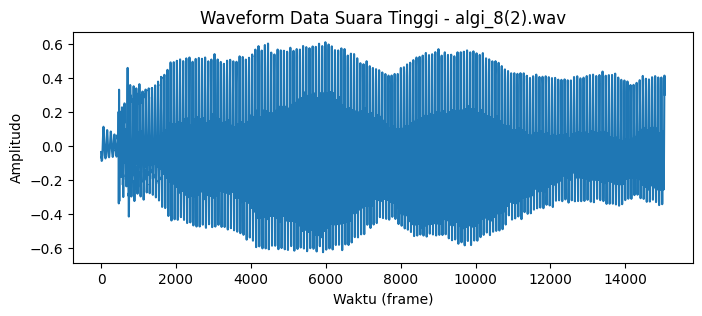

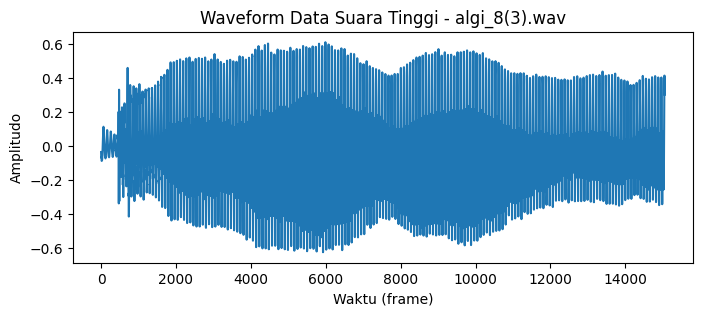

In [3]:
import os
import matplotlib.pyplot as plt
import librosa

# Mendapatkan list file suara dalam folder
file_list = os.listdir(path_suara_tinggi)

# Memilih hanya 3 file pertama
selected_files = file_list[:3]

# Loop melalui file-file yang dipilih
for file_name in selected_files:
    # Path ke file suara
    audio_path = os.path.join(path_suara_tinggi, file_name)
    
    # Baca data suara menggunakan Librosa
    audio_data, sampling_rate = librosa.load(audio_path)
    
    # Tampilkan visualisasi data suara menggunakan Matplotlib
    plt.figure(figsize=(8, 3))
    plt.plot(audio_data)
    plt.title(f'Waveform Data Suara Tinggi - {file_name}')
    plt.xlabel('Waktu (frame)')
    plt.ylabel('Amplitudo')
    plt.show()

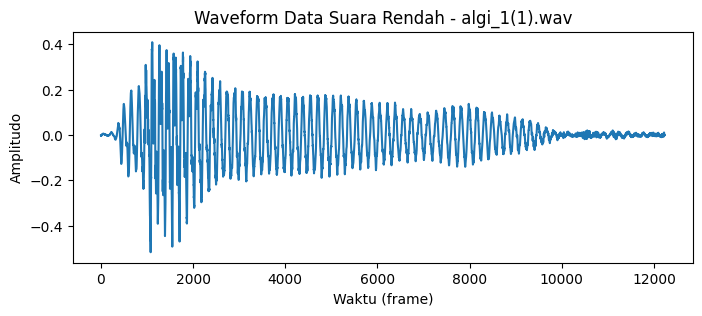

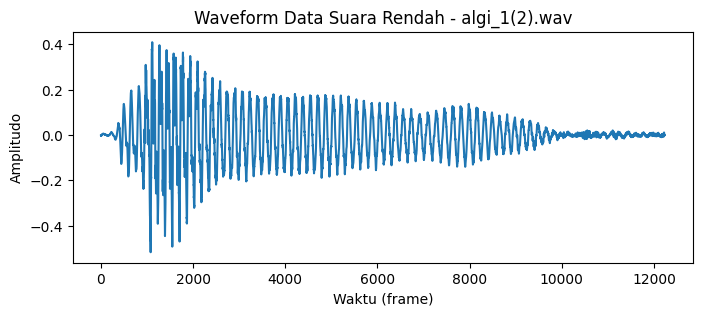

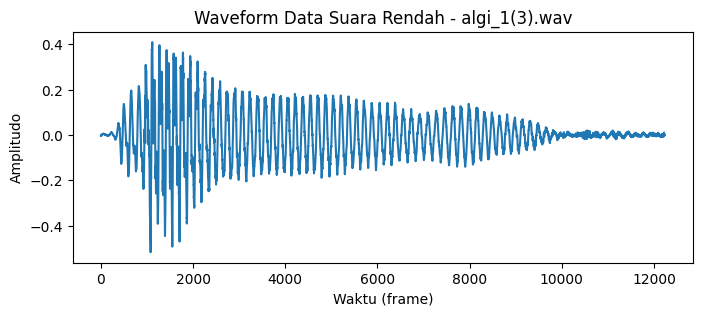

In [4]:
import os
import matplotlib.pyplot as plt
import librosa

# Mendapatkan list file suara dalam folder
file_list = os.listdir(path_suara_rendah)

# Memilih hanya 3 file pertama
selected_files = file_list[:3]

# Loop melalui file-file yang dipilih
for file_name in selected_files:
    # Path ke file suara
    audio_path = os.path.join(path_suara_rendah, file_name)
    
    # Baca data suara menggunakan Librosa
    audio_data, sampling_rate = librosa.load(audio_path)
    
    # Tampilkan visualisasi data suara menggunakan Matplotlib
    plt.figure(figsize=(8, 3))
    plt.plot(audio_data)
    plt.title(f'Waveform Data Suara Rendah - {file_name}')
    plt.xlabel('Waktu (frame)')
    plt.ylabel('Amplitudo')
    plt.show()

In [5]:
# Fungsi untuk mengekstraksi fitur MFCC dari suara
def extract_mfcc(audio):
    audio, sample_rate = librosa.load(audio)
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)  # Mengambil 20 koefisien MFCC
    return mfcc_features.T

In [6]:
# Membaca file suara tinggi
suara_tinggi = []
labels_tinggi = []
for filename in os.listdir(path_suara_tinggi):
    if filename.endswith(".wav"):
        mfcc = extract_mfcc(os.path.join(path_suara_tinggi, filename))
        suara_tinggi.extend(mfcc)
        labels_tinggi.extend(["tinggi"] * len(mfcc))

# Membaca file suara rendah
suara_rendah = []
labels_rendah = []
for filename in os.listdir(path_suara_rendah):
    if filename.endswith(".wav"):
        mfcc = extract_mfcc(os.path.join(path_suara_rendah, filename))
        suara_rendah.extend(mfcc)
        labels_rendah.extend(["rendah"] * len(mfcc))

In [7]:
# Menggabungkan data suara tinggi dan suara rendah
X = np.array(suara_tinggi + suara_rendah)
y = np.array(labels_tinggi + labels_rendah)

# Membagi data menjadi subset latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Membuat objek model Random Forest
# Membuat objek model Random Forest dengan perubahan parameter
model = RandomForestClassifier(n_estimators=15, max_depth=5)

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=15)

In [8]:
# Menggunakan model untuk melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan metrik evaluasi
print("Akurasi Model :", accuracy)

Akurasi Model : 0.9923371647509579


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan metrik evaluasi
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1 Score: {:.5f}".format(f1))

Accuracy: 0.99234
Precision: 0.99245
Recall: 0.99234
F1 Score: 0.99233


In [12]:
contoh_suara = "test/dian_atas (1).wav"
mfcc_contoh_suara = extract_mfcc(contoh_suara)
prediksi_contoh_suara = model.predict(mfcc_contoh_suara)
print("Prediksi :", "Suara ", prediksi_contoh_suara[0])

Prediksi : Suara  tinggi


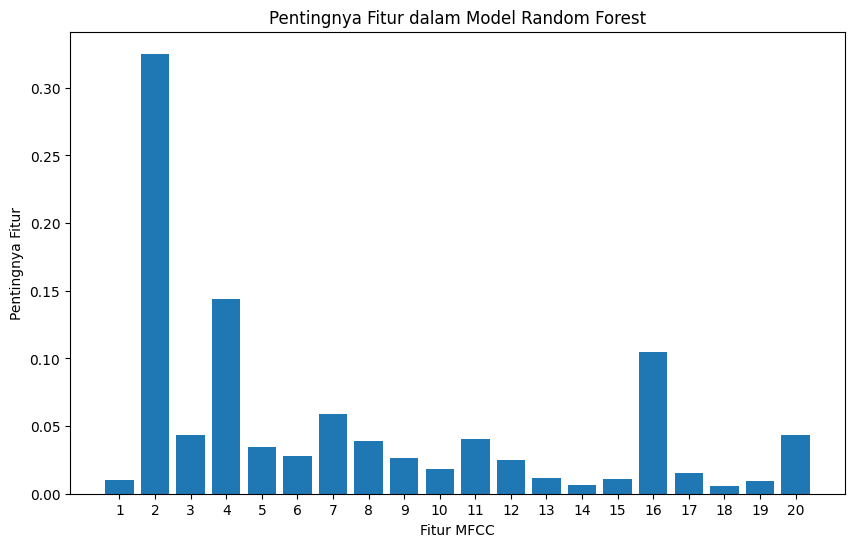

In [13]:
import matplotlib.pyplot as plt

# Mengambil pentingnya fitur dari model Random Forest
feature_importances = model.feature_importances_

# Menampilkan pentingnya fitur dalam bentuk grafik batang
n_features = X.shape[1]
plt.figure(figsize=(10, 6))
plt.bar(range(n_features), feature_importances)
plt.xticks(range(n_features), range(1, n_features+1))
plt.xlabel('Fitur MFCC')
plt.ylabel('Pentingnya Fitur')
plt.title('Pentingnya Fitur dalam Model Random Forest')
plt.show()